In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
file = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

file.isna().any().any()  # no missing values

False

In [5]:
file.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [12]:
#determine which features are the most important with mutual information
#decompose a dataset's variation into features with principal component analysis

### Mutual information

In [7]:
from sklearn.feature_selection import mutual_info_regression
X = file.copy()
y = X.pop('Diabetes_012')
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

discrete_features = X.dtypes == int

#mi_scores = make_mi_scores(X, y, discrete_features)

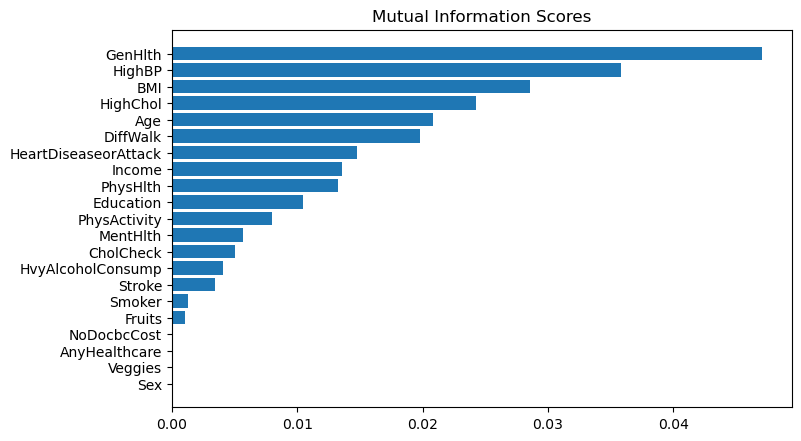

In [38]:
from matplotlib import pyplot as plt

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### PCA

In [60]:
all_features = list(file.columns)
print(all_features)

['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [68]:
from sklearn.decomposition import PCA

# features that relatively cover all properties and have a MI score > 0.01 with the target
features = ["GenHlth", "HighBP", "BMI", "DiffWalk", "Education", "Income", "Age"]  

# features with MI score > 0.01
features2 = ["BMI", "GenHlth", "HighBP", "HighChol",  "HeartDiseaseorAttack", "PhysHlth", "Education", "Income", "Age"]

X_ = X.loc[:, features]
#X_ = X.loc[:, features2]
X_scaled = (X_ - X_.mean(axis=0)) / X_.std(axis=0)

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,4.044127,0.458946,1.165894,-0.522029,0.008053,0.053978,-0.012893
1,0.183519,1.164552,-0.766599,-0.649474,-0.407702,-1.978820,-1.392715
2,2.557531,-0.551462,0.496531,-1.317969,-0.728574,1.986958,0.717574
3,0.975372,-0.405941,-1.238875,1.796660,0.168490,0.803076,0.724737
4,0.530145,-0.922105,-1.190813,0.773645,-0.346709,-0.928973,0.034895


In [69]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
GenHlth,0.477886,0.079024,0.147390,-0.312599,-0.408507,0.391242,-0.570955
HighBP,0.363370,-0.516743,0.115918,0.378197,-0.548235,-0.137340,0.353618
BMI,0.248667,0.071553,0.772947,0.349793,0.432647,-0.081503,-0.139343
DiffWalk,0.434875,-0.011904,0.118131,-0.649191,0.243474,-0.017743,0.561910
Education,-0.367878,-0.411992,0.341373,-0.457666,-0.147478,-0.520022,-0.277060
Income,-0.428756,-0.364722,0.304105,-0.066604,0.020284,0.739395,0.197774
Age,0.263571,-0.647079,-0.380028,0.039361,0.513747,0.063111,-0.312936


In [70]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    0.082570
PC5    0.059705
PC2    0.056451
PC3    0.055691
PC4    0.050755
PC6    0.049260
PC7    0.044644
Name: MI Scores, dtype: float64

### PCA with the number of components automaticaly chosen to account for a given percent of the total variance

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components = 0.9)        #keep 90% of the total variance
pca.fit(scaled_data)
X_pca=pca.transform(scaled_data)
print(X_pca.shape)

(253680, 17)


In [9]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [10]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1     0.066151
PC7     0.021656
PC2     0.019953
PC13    0.017163
PC8     0.016564
PC6     0.015485
PC11    0.011862
PC5     0.010314
PC15    0.010220
PC4     0.009628
PC9     0.009434
PC17    0.009057
PC10    0.009042
PC12    0.009022
PC3     0.008675
PC16    0.007720
PC14    0.007696
Name: MI Scores, dtype: float64

In [14]:

print(type(scaled_data))
print(type(Y))
#print(Y.shape)
#print(scaled_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#Y = file['Diabetes_012'].values
#X = file.loc[:, file.columns!='Diabetes_012'].values
Y=y.values
X_train, X_test, Y_train, Y_test = train_test_split( X_pca.values, Y, test_size=0.2, random_state=20)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(202944, 17)
(50736, 17)
(202944,)
(50736,)
